## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()
df = diabetes_data

**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
print('Count of zeros in before replace: {0}'.format((df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum().sum()))
print('Count of nans in before replace: {0}'.format(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].isna().sum().sum()))
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(to_replace=0, value=np.nan)
print('Count of zeros in after replace: {0}'.format((df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum().sum()))
print('Count of nans in after replace: {0}'.format(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].isna().sum().sum()))

print('\n')
print('Count of nans by column after replace: {0}'.format((df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].isna()).sum()))
print('\n')
print('!WARNING!: Almosts half of Insulin and one third  of Skin Thickness columns are missing!! Be mindful of their treatment and the results')


Count of zeros in before replace: 652
Count of nans in before replace: 0
Count of zeros in after replace: 0
Count of nans in after replace: 652


Count of nans by column after replace: Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


!WARNING!: Almosts half of Insulin and one third  of Skin Thickness columns are missing!! Be mindful of their treatment and the results


**<font color='teal'> Plot histograms of each column. </font>**

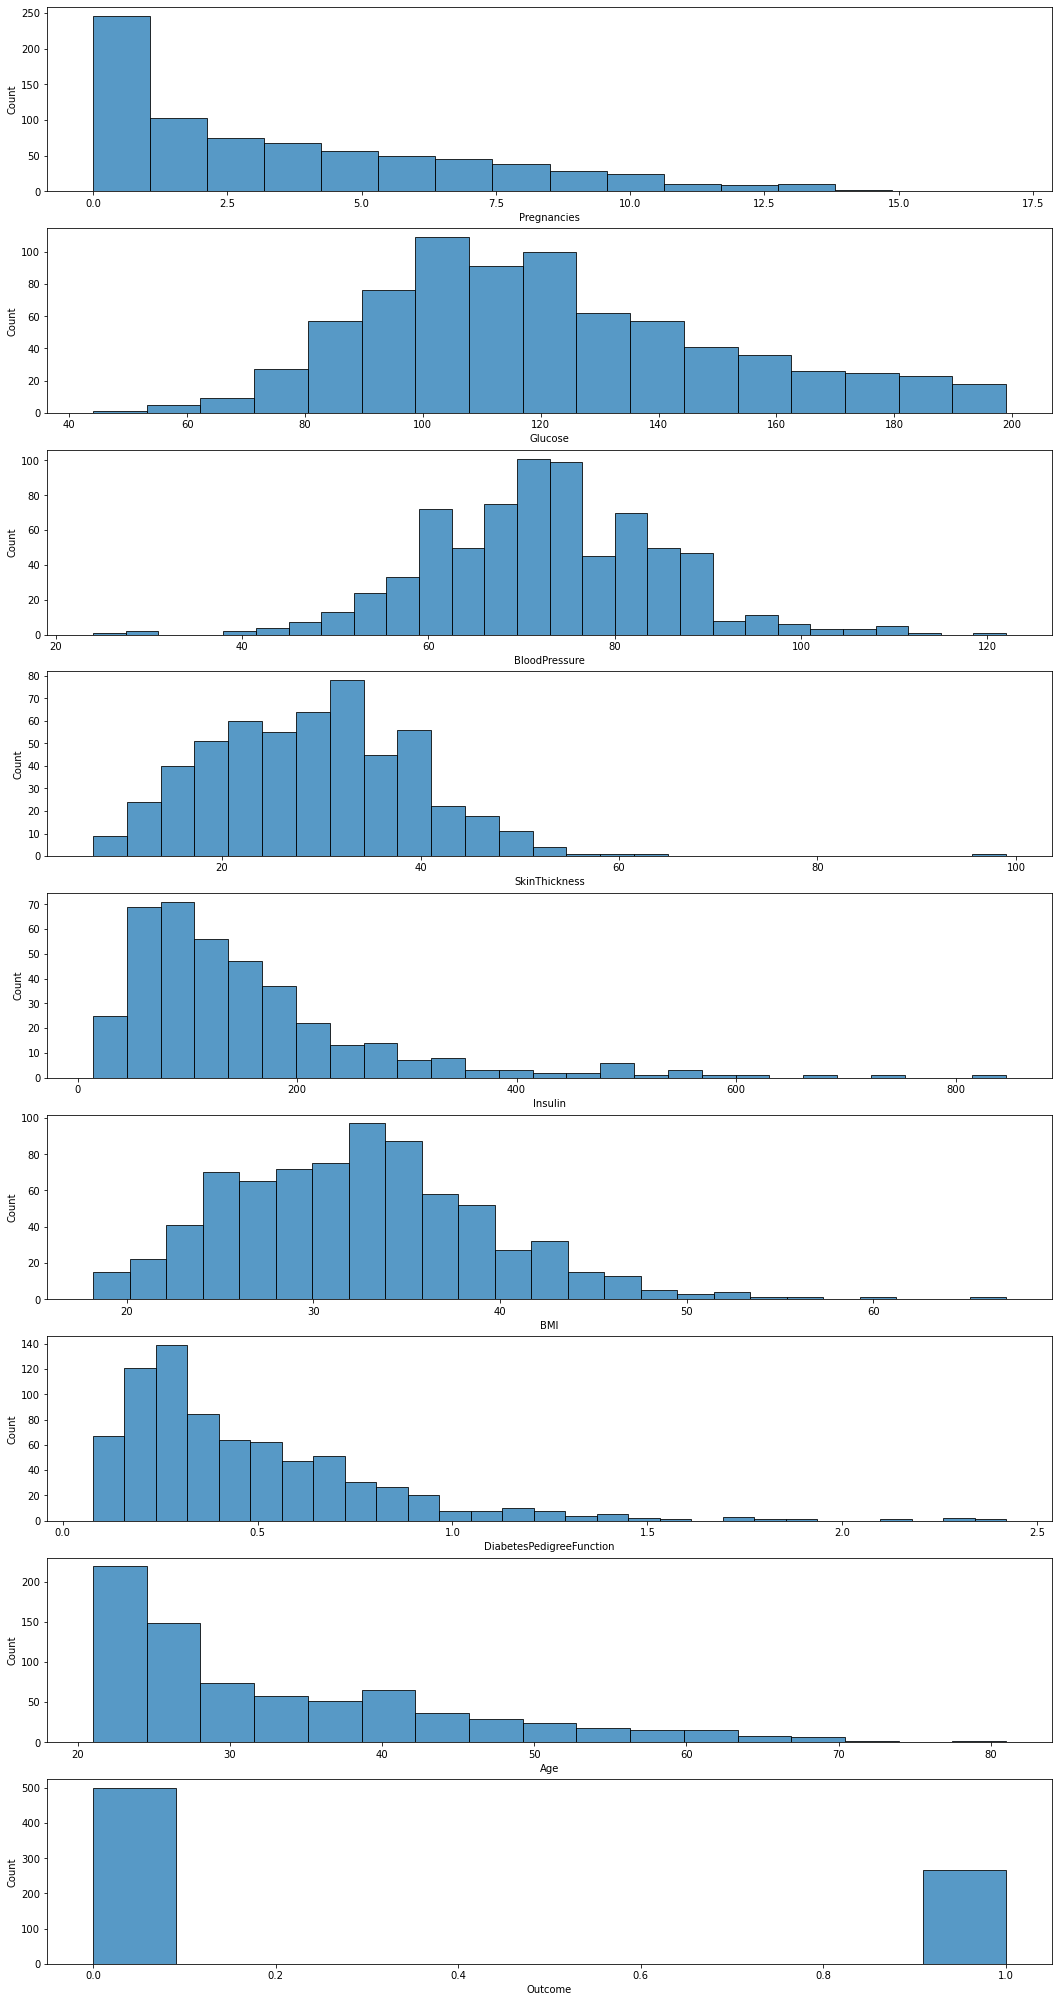

In [6]:
fig, ax = plt.subplots(len(df.columns))
sns.set_context('paper')
fig.set_size_inches(18,36)
for i in range(len(df.columns)):
    sns.histplot(x=df.columns[i], data=df, ax=ax[i])
    ax[i].set_xlabel(df.columns[i])
plt.show()

#### Replace the zeros with mean and median values.

In [7]:
print('Had we dropped all NA\'s we\'d have {0:d} rows instead of {1:d}'.format(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].dropna().shape[0], df.shape[0]))

diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)
print('NA\'s now replaced with means/medians. Keep an eye on Insulin and Skin Thickness.')

Had we dropped all NA's we'd have 392 rows instead of 768
NA's now replaced with means/medians. Keep an eye on Insulin and Skin Thickness.


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

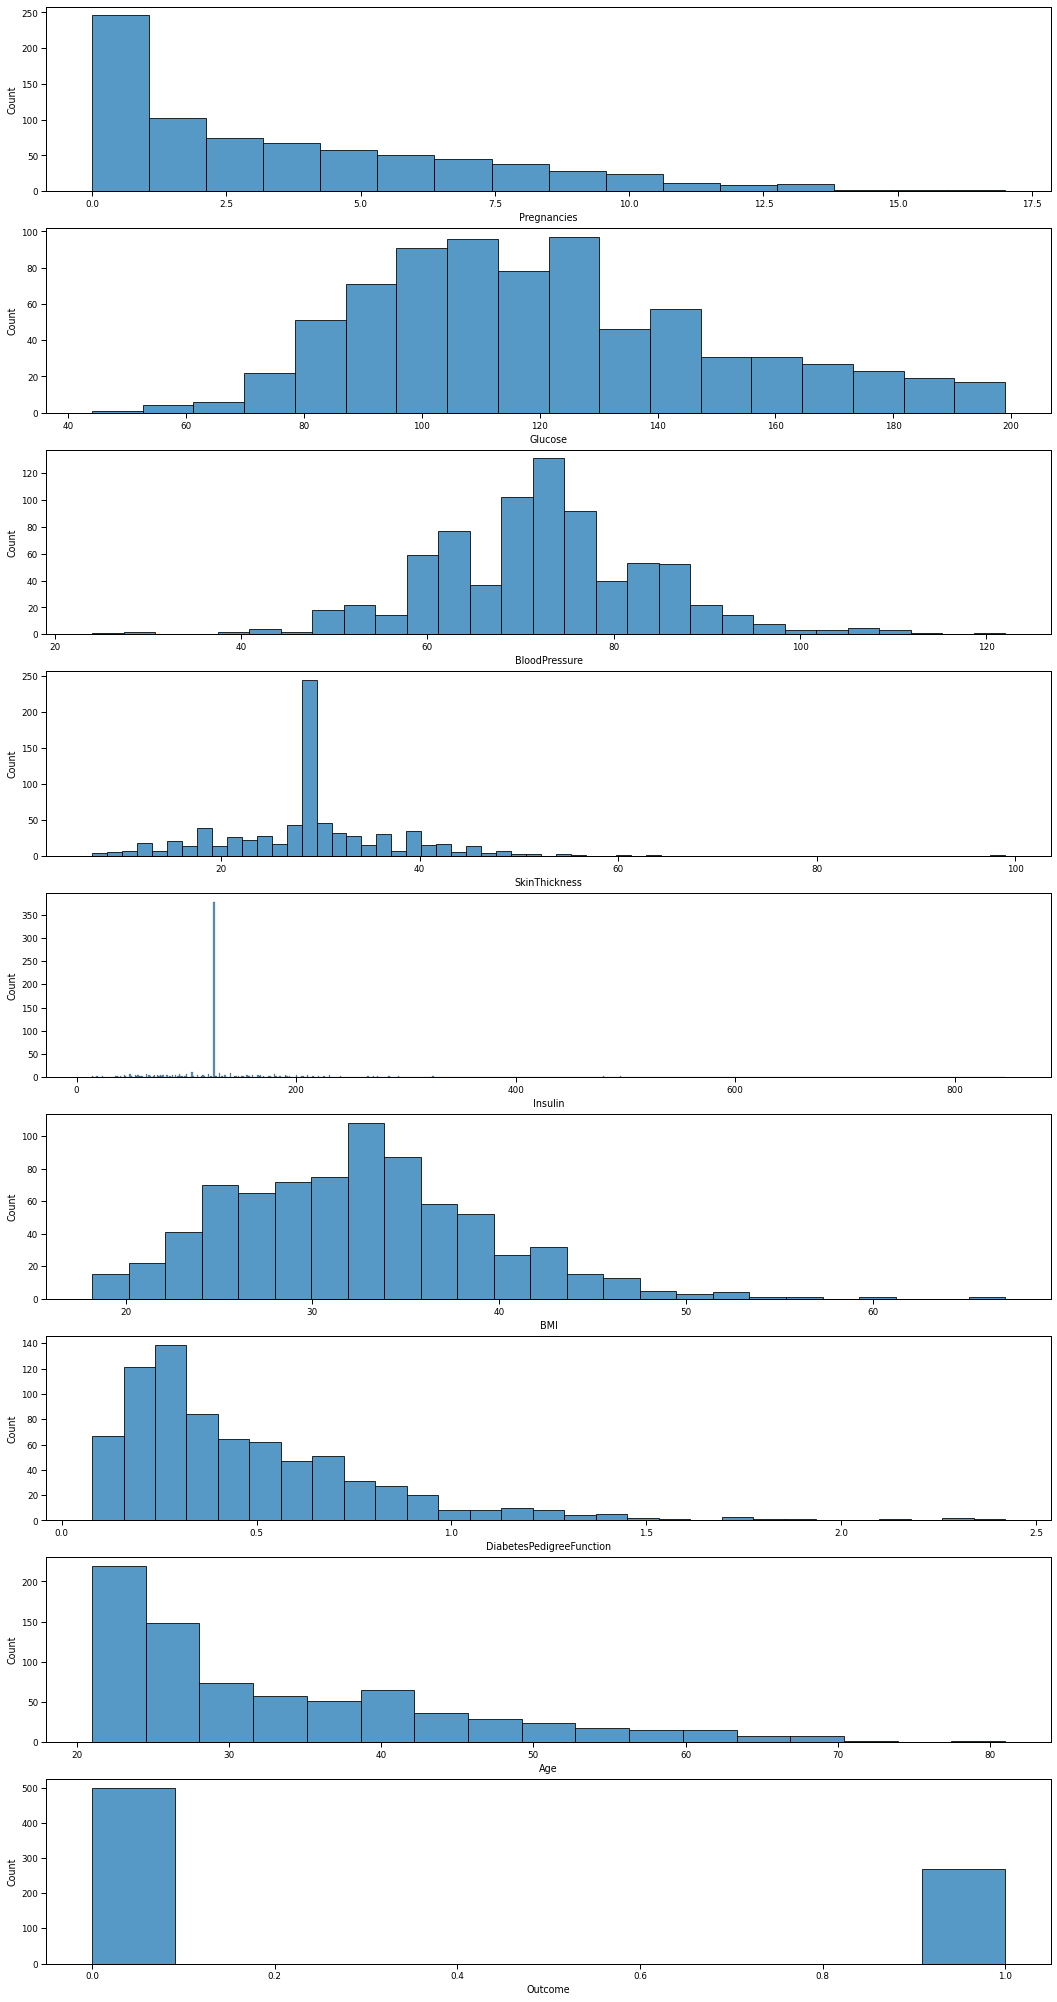

In [8]:
fig, ax = plt.subplots(len(df.columns))
sns.set_context('paper')
fig.set_size_inches(18,36)
for i in range(len(df.columns)):
    sns.histplot(x=df.columns[i], data=df, ax=ax[i])
    ax[i].set_xlabel(df.columns[i])
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


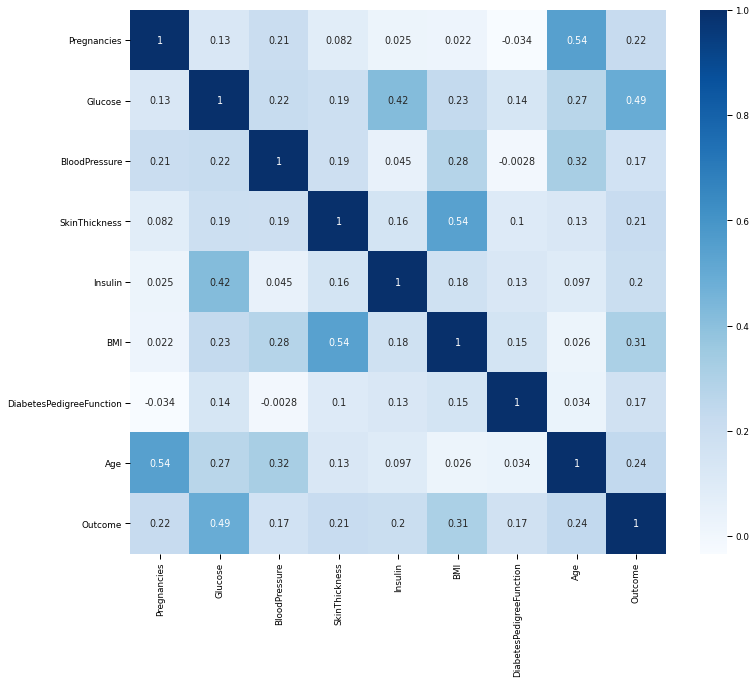

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
y = df['Outcome'].values

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), y)
y_train, y_test = y_train.reshape(-1,), y_test.reshape(-1,)
print(type(y_train))
print(type(y_train.shape))
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'tuple'>
(576,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
xscaler = StandardScaler()
xscaler.fit(X_train)
X_train_scaled = xscaler.transform(X_train)
X_test_scaled = xscaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [14]:
print('Iteration Neighbors, Train Scores and Test Scores:\n')
for _ in zip(range(1,15), train_scores, test_scores):
    print('{0: >2d}, {1:.3f}, {2:.3f}'.format(_[0], _[1], _[2]))


Iteration Neighbors, Train Scores and Test Scores:

 1, 1.000, 0.667
 2, 0.840, 0.688
 3, 0.849, 0.661
 4, 0.830, 0.682
 5, 0.823, 0.646
 6, 0.814, 0.672
 7, 0.812, 0.672
 8, 0.811, 0.688
 9, 0.814, 0.703
10, 0.788, 0.714
11, 0.792, 0.688
12, 0.785, 0.693
13, 0.781, 0.693
14, 0.776, 0.693


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [15]:
print('Neighbors with Max score in Traning: {0}'.format(*max(list(zip(range(1,15), train_scores)), key=lambda x: x[1])))

Neighbors with Max score in Traning: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [16]:
print('Neighbors with Max score in Test: {0}'.format(*max(list(zip(range(1,15), test_scores)), key=lambda x: x[1])))


Neighbors with Max score in Test: 10


Plot the train and test model performance by number of neighbors.

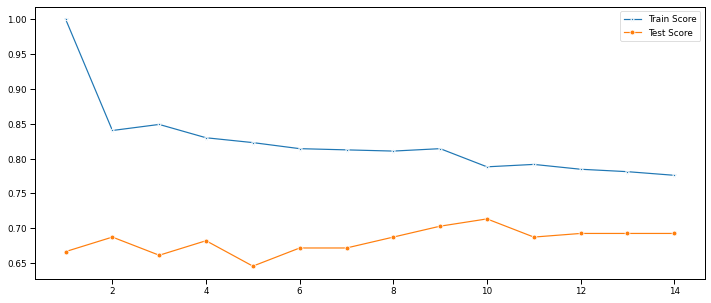

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [18]:
knn_best = KNeighborsClassifier(n_neighbors=12)
knn_best.fit(X_train, y_train)
knn_best.score(X_test, y_test)

0.6927083333333334

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn_best.predict(X_test)
confusion_matrix(y_test,y_pred)


array([[98, 25],
       [34, 35]])

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

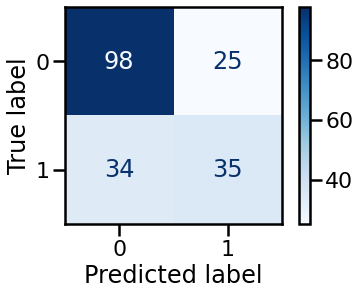

In [20]:
from sklearn.metrics import plot_confusion_matrix
sns.set_context('poster')
ax = plot_confusion_matrix(knn_best, X_test, y_test, cmap='Blues')
plt.gca().grid(False)

**<font color='teal'> Print the classification report </font>**

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       123
           1       0.58      0.51      0.54        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.66       192
weighted avg       0.69      0.69      0.69       192



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(df.drop(['Outcome'], axis=1),y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [23]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [24]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {'n_estimators':[60, 80, 100], 'max_depth':[1,2,3,4,5,6]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf,param_grid_rf,cv=5)
rf_cv.fit(df.drop(['Outcome'], axis=1),y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [60, 80, 100]})

In [25]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=60)

In [26]:
df_rf_cv = pd.DataFrame(data=rf_cv.cv_results_)
df_rf_cv_short = df_rf_cv[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'std_test_score']]
print(df_rf_cv_short)

   param_n_estimators param_max_depth  mean_test_score  std_test_score
0                  60               1         0.697912        0.019575
1                  80               1         0.684908        0.011690
2                 100               1         0.678363        0.013863
3                  60               2         0.738333        0.017369
4                  80               2         0.751303        0.011896
5                 100               2         0.739615        0.024696
6                  60               3         0.761760        0.019948
7                  80               3         0.756566        0.019769
8                 100               3         0.757830        0.021371
9                  60               4         0.765648        0.021930
10                 80               4         0.760479        0.028748
11                100               4         0.764383        0.026620
12                 60               5         0.759180        0.033016
13    

15


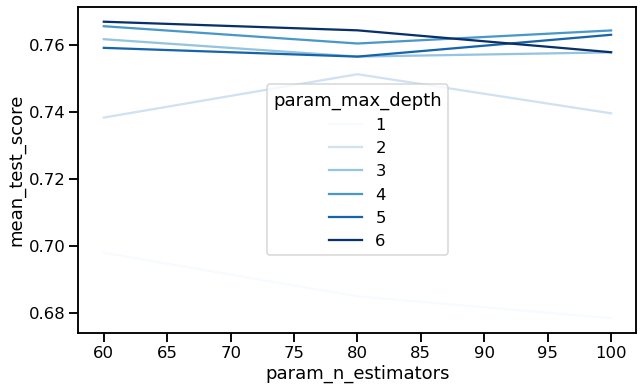

In [28]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data =df_rf_cv_short, palette='Blues')
sns.set_context('talk')
plt.gcf().set_size_inches(10,6)
idxmax = df_rf_cv_short['mean_test_score'].idxmax()
print(idxmax)